<a href="https://colab.research.google.com/github/ashishk30/Praxis-data-science/blob/main/Star_wars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ashish Sachin Kulkarni TEMEA143 Domain:- DataScience**

Import the required libraries

In [60]:
import numpy as np                                                              ###Import all the libraries required for data analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Use the ipywidgets to import the file from the system for data analysis.

In [61]:
import ipywidgets as widgets                                                    ###Using the ipywidgets to import the given excel file from the dataset.
widgets.IntSlider()                                                             ###This will allow us to import any file from our device and analyze any given dataset.
from IPython.display import display
w = widgets.IntSlider()
uploader = widgets.FileUpload(
    accept='*.csv',  
    multiple=False)
display(uploader)

FileUpload(value={}, accept='*.csv', description='Upload')

In [62]:
import io                                                                       ###Import io module use this method to save time and fast accessibility.
import pandas as pd
input_file = list(uploader.value.values())[0]
content = input_file['content']
content = io.StringIO(content.decode('utf-8'))
df = pd.read_csv(content)

In [63]:
df.head()                                                                       ###Print first 5 rows to check whether correct has been uploaded and analysed or not.

,Sr. No,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success


In [64]:
df.shape                                                                        ###Check the number of rows and columns the given file has.

(4324, 9)

In [65]:
df.info()                                                                       ###Get the info regarding the type of our data no of non null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sr. No          4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [66]:
df.isnull().sum()                                                               ###This will return the number of null values in a column.

Sr. No               0
Unnamed: 0           0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [67]:
df =df.dropna()                                                                 ###Used to drop the missing values (along with the entire row).

In [68]:
df.info()                                                                       ###Check if the values hav been updated or not.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sr. No          964 non-null    int64 
 1   Unnamed: 0      964 non-null    int64 
 2   Company Name    964 non-null    object
 3   Location        964 non-null    object
 4   Datum           964 non-null    object
 5   Detail          964 non-null    object
 6   Status Rocket   964 non-null    object
 7    Rocket         964 non-null    object
 8   Status Mission  964 non-null    object
dtypes: int64(2), object(7)
memory usage: 75.3+ KB


In [69]:
df.shape                                                                        ###Confirm The new shape.

(964, 9)

In [70]:
df.head()                                                                       ###This will be our new dataset for analysis.

,Sr. No,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


We will do analysis from here.
First is Company Name and total number of launches till date. 
The Company Name and the total number will be displayed as an output.

In [72]:
temp = pd.DataFrame({"Company Name and Total Number of Launches as of now. ":df['Company Name']})                        ###Create a temp dataframe which will comprise of Company Name and then count the values.
count_launches = temp.value_counts()
print(count_launches)                                                           

Company Name and Total Number of Launches as of now. 
CASC                                                     158
NASA                                                     149
SpaceX                                                    99
ULA                                                       98
Arianespace                                               96
Northrop                                                  83
ISRO                                                      67
MHI                                                       37
VKS RF                                                    33
US Air Force                                              26
Roscosmos                                                 23
Kosmotras                                                 22
Rocket Lab                                                13
ILS                                                       13
Eurockot                                                  13
Martin Marietta                

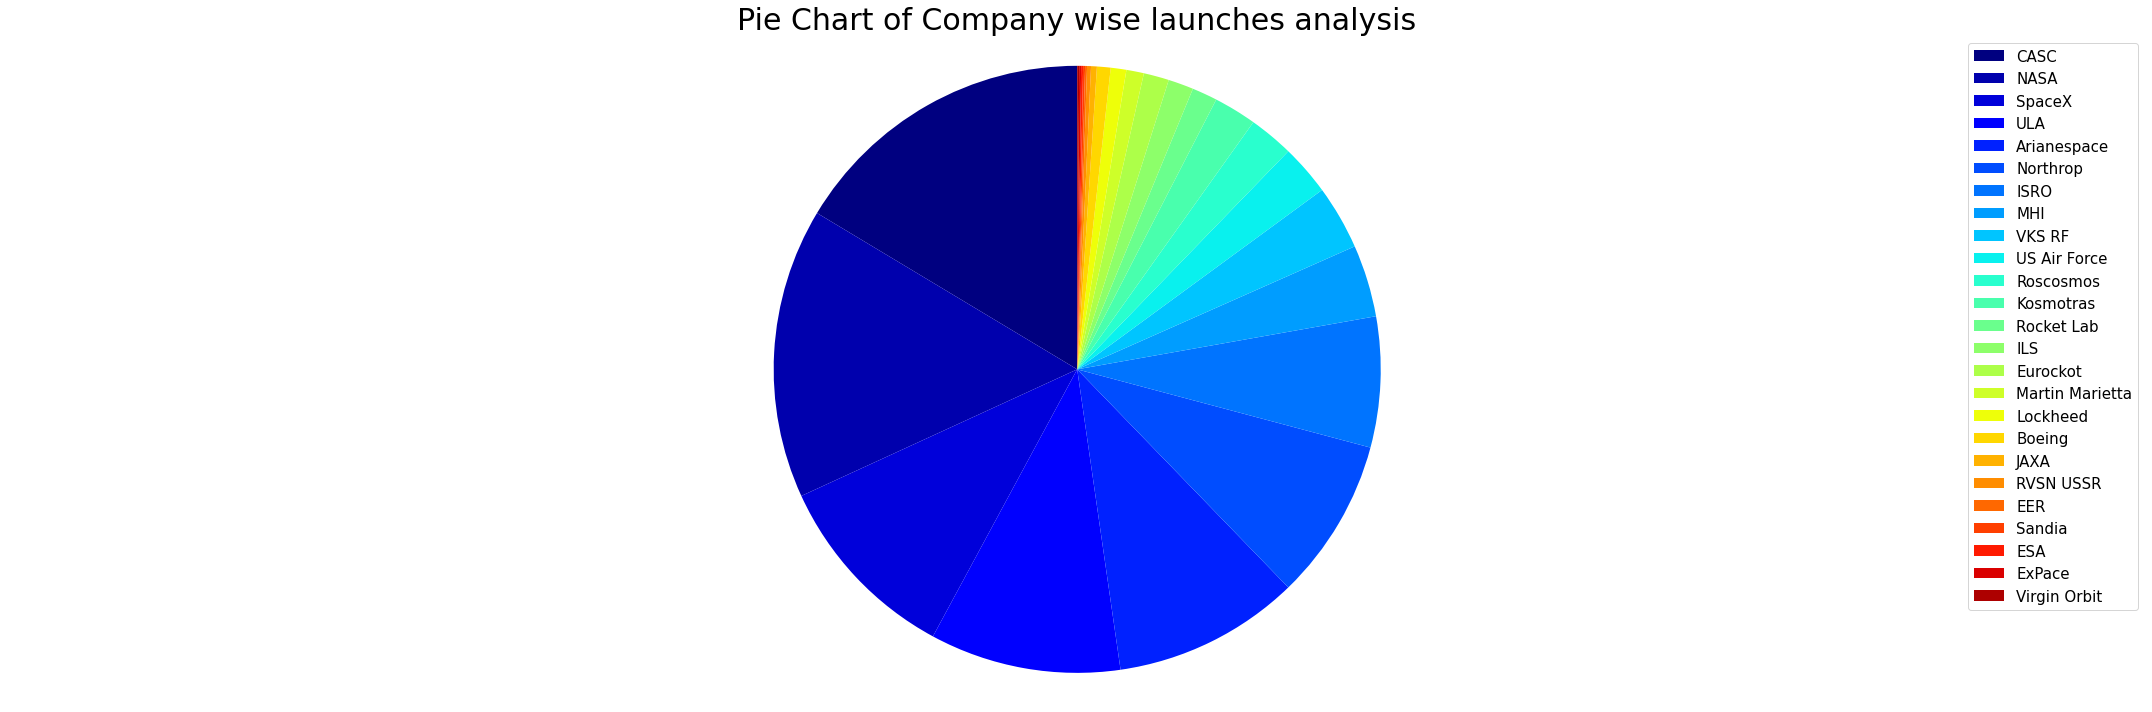

In [77]:
labels = [X[0] for X in count_launches.keys()]                                  ###We will now represent it in the form of a chart.

sizes = count_launches
labels = labels
 
fig1, ax1 = plt.subplots(figsize=(30, 10))                                      ###Adjust the figure size according to our requirements.
fig1.subplots_adjust(0.3, 0, 1, 1)
 
theme = plt.get_cmap('jet')                                                     ###Theme has been selected for better visualization.
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes))
                             for i in range(len(sizes))]) 
total = sum(sizes)
patches, texts = plt.pie(sizes, startangle=90)
plt.title("Pie Chart of Company wise launches analysis",fontsize=30)
plt.legend(patches, labels, loc="best", prop={'size': 15})
plt.axis('equal')
plt.tight_layout()
plt.show()                                                                      ###A pie chart has been generated.

Now in the next step we will analyse Successful launches done(Company Wise).
We will display the coompany name and the no of times the launch was successful.


In [79]:
successful = pd.DataFrame({"Successful Launches Count By Each Company":df['Company Name'][df['Status Mission']=='Success']})        ###Create another temp dataframe and store the required values
suc_launches = successful.value_counts()
print(suc_launches)

Successful Launches Count By Each Company
CASC                                         152
NASA                                         146
ULA                                           97
Arianespace                                   93
SpaceX                                        93
Northrop                                      74
ISRO                                          59
MHI                                           37
VKS RF                                        30
US Air Force                                  23
Roscosmos                                     22
Kosmotras                                     21
ILS                                           13
Eurockot                                      12
Rocket Lab                                    11
Lockheed                                       8
Martin Marietta                                7
Boeing                                         6
JAXA                                           3
RVSN USSR                  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


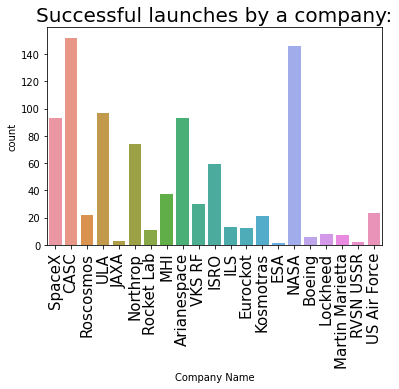

In [81]:
sns.countplot(df['Company Name'][df['Status Mission']=='Success'], data=df)     ###Now represent the given data in the form of barplot.
plt.title("Successful launches by a company:", fontsize = 20)
plt.xticks(rotation = 90,fontsize=15)                                           ###Rotate the x axis values in 90 degrees for btter visuals.
plt.show()

Now we will try to represent the set of Rockets launched by each Company.


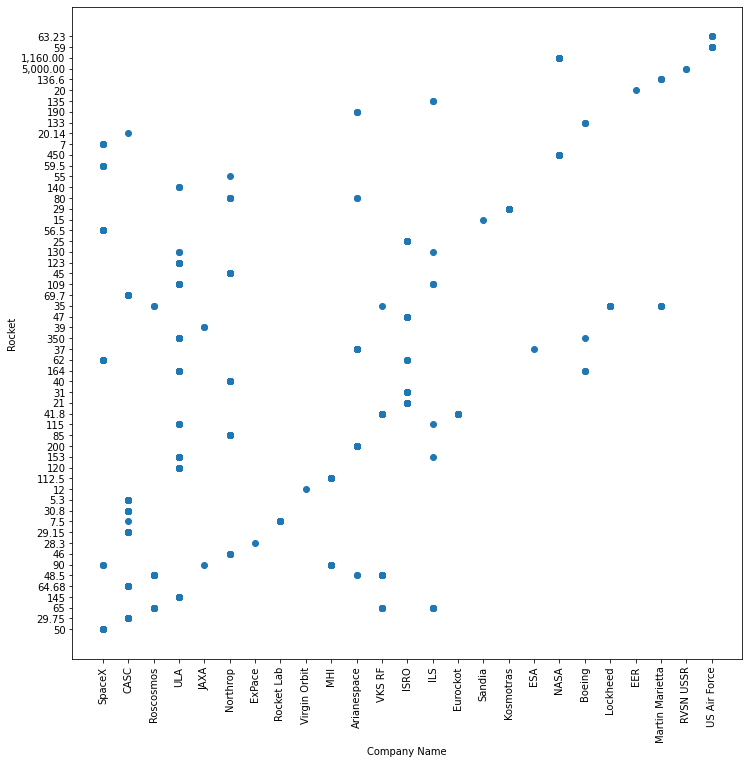

In [82]:
fig, ax = plt.subplots(figsize=(12, 12))                                        ###We will use a scatter plot for this purpose for clear relation and better visuals.
ax.scatter(x = df['Company Name'], y = df[' Rocket'])
plt.xlabel("Company Name")
plt.ylabel("Rocket")
plt.xticks(rotation=90)

plt.show()

Now analysis of Status of Rocket launced and Company.

In [83]:
status = df['Company Name'].unique()                                            ###We will see how many rocts are active and how many are retired.
status_returned = pd.DataFrame([],columns=['Company Name:','Status:','No of times:'])       ###Create a blank dataframe which will contain company name status and no of times.
for id, element in enumerate(status):
  temp_active = df[(df['Company Name']== element) & (df['Status Rocket']== 'StatusActive')]
  temp_inactive = df[(df['Company Name']== element) & (df['Status Rocket']== 'StatusRetired')]

  #append to status_returned
  status_returned = status_returned.append({'Company Name:':element,
                                            'Status:':'StatusActive','No of times:':temp_active['Company Name'].count()},ignore_index= True)
  status_returned = status_returned.append({'Company Name:' :element,'Status:':'StatusRetired','No of times:':temp_inactive['Company Name'].count()},ignore_index= True)


In [84]:
status_returned

,Company Name:,Status:,No of times:
0,SpaceX,StatusActive,37
1,SpaceX,StatusRetired,62
2,CASC,StatusActive,158
3,CASC,StatusRetired,0
4,Roscosmos,StatusActive,23
5,Roscosmos,StatusRetired,0
6,ULA,StatusActive,86
7,ULA,StatusRetired,12
8,JAXA,StatusActive,3
9,JAXA,StatusRetired,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

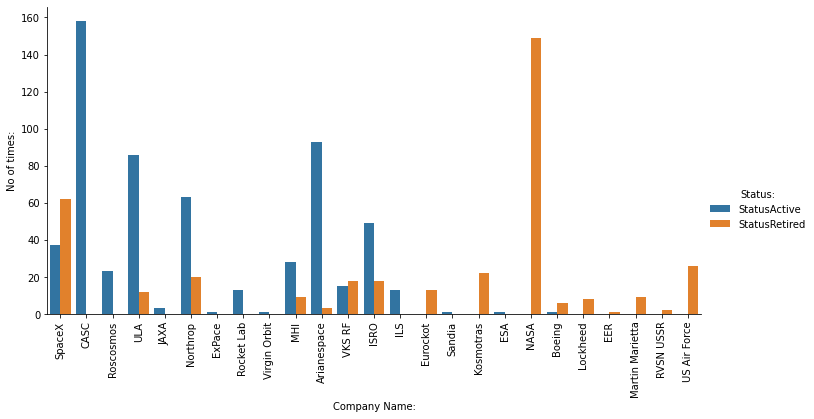

In [87]:
sns.catplot(x="Company Name:", y="No of times:", hue="Status:" ,data=status_returned,kind='bar',height=5,aspect=2)              ###We will use the catplot for better comparison.

plt.xticks(rotation=90)


In [88]:
df.head()                                                                       

,Sr. No,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [89]:
df[["Day", "Month", "Date","Year","Time","Zone"]] = df["Datum"].str.split(" ", expand = True)               ###Split the the datum part for better analysis using split function.


In [90]:
df.head()                                                                       ###See if changes have been done or not.

,Sr. No,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Day,Month,Date,Year,Time,Zone
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50,Success,Fri,Aug,"07,",2020,05:12,UTC
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,"06,",2020,04:01,UTC
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65,Success,Thu,Jul,"30,",2020,21:25,UTC
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145,Success,Thu,Jul,"30,",2020,11:50,UTC
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,Sat,Jul,"25,",2020,03:13,UTC


Now the analysis of Successful no of launches in each year.
Represent the data in descending order.

In [91]:
year_wise = pd.DataFrame({"Year Wise Successful Launches":df['Year'][df['Status Mission']=='Success']})
year_launches = year_wise.value_counts()
print(year_launches)

Year Wise Successful Launches
2018                             87
2019                             71
2017                             62
2016                             61
2020                             48
2014                             40
2015                             37
2013                             31
2009                             30
2008                             27
2010                             27
2011                             27
2007                             26
2006                             24
2012                             24
2003                             19
1998                             18
1997                             17
2004                             16
2002                             16
2000                             16
2005                             14
1999                             14
1996                             13
1994                             13
1992                             12
1985                             1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


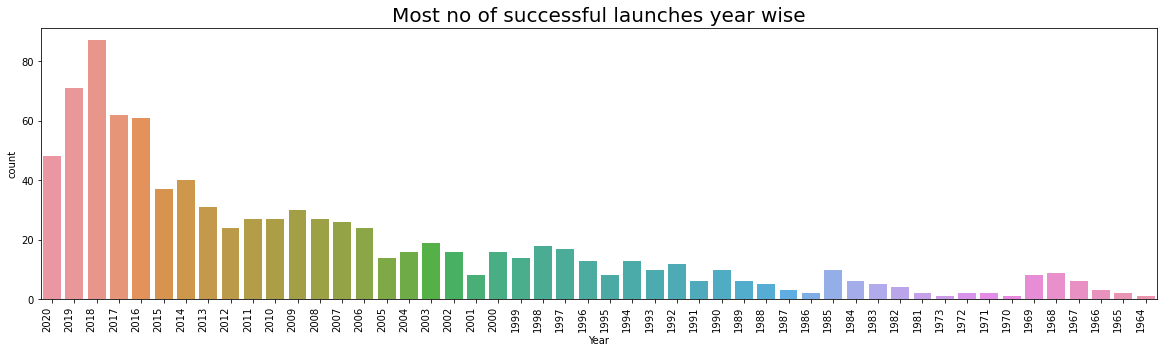

In [93]:
plt.subplots(figsize=(20,5))                                                    ###Use the countplot method to represent the data
sns.countplot(df['Year'][df['Status Mission']=='Success'], data=df)
plt.title("Most no of successful launches year wise", fontsize = 20)
plt.xticks(rotation = 90,fontsize=10,ha="right")
plt.show()

In [94]:
latest_launches=df.sort_values(by=['Year','Month'], ascending=False)            ###Sort the dataset in descending order(year and month both) and store it in a temp variable.
latest_launches.head()

,Sr. No,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission,Day,Month,Date,Year,Time,Zone
24,24,24,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Sun May 31, 2020 08:53 UTC",Long March 2D | Gaofen-9-02 & HEAD-4,StatusActive,29.75,Success,Sun,May,"31,",2020,08:53,UTC
25,25,25,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Sat May 30, 2020 19:22 UTC",Falcon 9 Block 5 | SpaceX Demo-2,StatusActive,50,Success,Sat,May,"30,",2020,19:22,UTC
26,26,26,CASC,"Xichang Satellite Launch Center, China","Fri May 29, 2020 20:13 UTC",Long March 11 | XJS-G and XJS-H,StatusActive,5.3,Success,Fri,May,"29,",2020,20:13,UTC
27,27,27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12,Failure,Mon,May,"25,",2020,19:50,UTC
29,29,29,MHI,"LA-Y2, Tanegashima Space Center, Japan","Wed May 20, 2020 17:31 UTC",H-IIB | HTV-9,StatusRetired,112.5,Success,Wed,May,"20,",2020,17:31,UTC


Analysis of failed,successful,prefailed and prelaunch failed launches in each year and represent it in form of catplot.

In [95]:
status = df['Year'].unique()
status_launched = pd.DataFrame([],columns=['Year:','Status Mission:','No of times:'])
for id, element in enumerate(status):
  temp_suc = df[(df['Year']== element) & (df['Status Mission']== 'Success')]
  temp_fail = df[(df['Year']== element) & (df['Status Mission']== 'Failure')]
  temp_partial = df[(df['Year']== element) & (df['Status Mission']== 'Partial Failure')]
  temp_prelaunch = df[(df['Year']== element) & (df['Status Mission']== 'Prelaunch Failure')]

  #append to status_launched
  status_launched = status_launched.append({'Year:':element,
                                            'Status Mission:':'Success','No of times:':temp_suc['Year'].count()},ignore_index= True)
  status_launched = status_launched.append({'Year:' :element,'Status Mission:':'Failure','No of times:':temp_fail['Year'].count()},ignore_index= True)
  status_launched = status_launched.append({'Year:' :element,'Status Mission:':'Partial Failure','No of times:':temp_partial['Year'].count()},ignore_index= True)
  status_launched = status_launched.append({'Year:' :element,'Status Mission:':'Prelaunch Failure','No of times:':temp_prelaunch['Year'].count()},ignore_index= True)

status_launched

,Year:,Status Mission:,No of times:
0,2020,Success,48
1,2020,Failure,4
2,2020,Partial Failure,0
3,2020,Prelaunch Failure,0
4,2019,Success,71
...,...,...,...
195,1965,Prelaunch Failure,0
196,1964,Success,1
197,1964,Failure,1
198,1964,Partial Failure,0


Text(0.5, 1.0, 'Status Mission of Rockets Year Wise:')

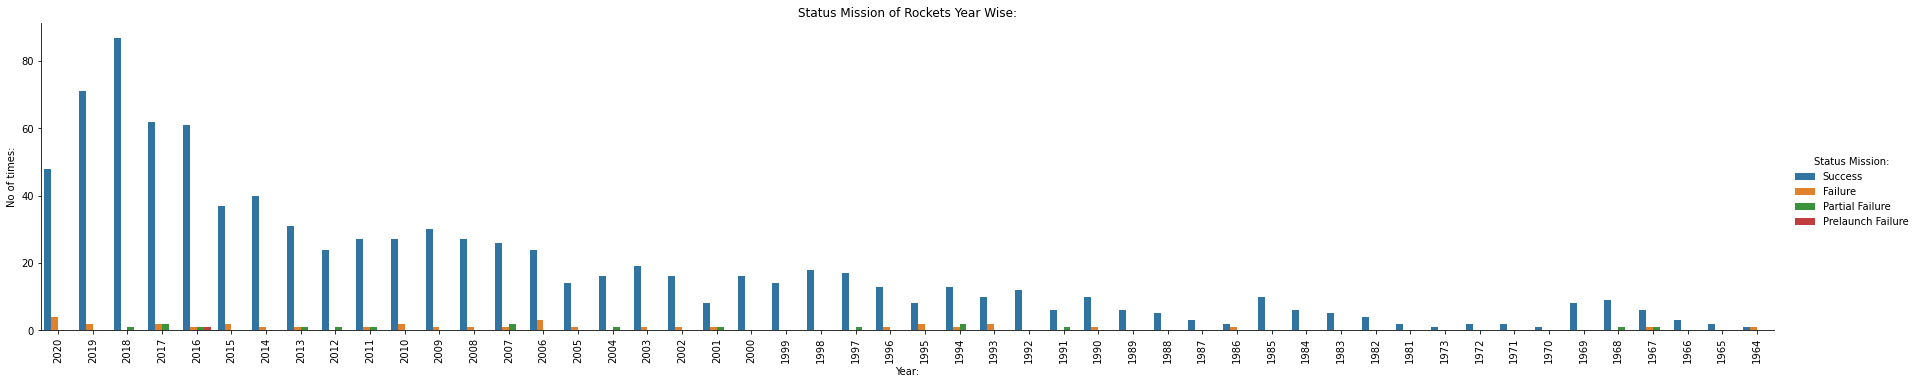

In [98]:
sns.catplot(x="Year:", y="No of times:", hue="Status Mission:" ,data=status_launched,kind='bar',height=5,aspect=5)

plt.xticks(rotation=90,fontsize=10)
plt.title("Status Mission of Rockets Year Wise:")
